# Bank marketing campaigns dataset analysis # Opening a Term Deposit

It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no
The binary classification goal is to predict if the client will subscribe a bank term deposit (variable Outcome).



* age (numeric)

* job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

* marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

* education(categorical:"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

* housing: has housing loan? (categorical: "no","yes","unknown")

* loan: has personal loan? (categorical: "no","yes","unknown")

* contact: contact communication type (categorical: "cellular","telephone")
* month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

* day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

* ncontact: number of contacts performed during this campaign and for this client (numeric, includes last contact)

* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* previous: number of contacts performed before this campaign and for this client (numeric)

* poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Importing necessary libraries

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

 ## Data Preprocessing
 * In the data preprocessing phase we first examined the shape of the data to understand its dimension
 * Next, We checked for null values in the dataset and removed if any were found
 * Additionally, we performed a check for duplicate values and removed them to ensure data integrity
 * To gain insights into relationships between different variables we performed bivariate and multivariate analysis and then visualized the correlation map using a heatmap. This visualization allowed us to identify the patterns and dependencies among the features in the dataset.

In [184]:
Data = pd.read_csv(r"C:\Users\Deepak Chaudhary\Downloads\Bank_Campaign_Data.csv")
Data.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,ncontacts,pdays,previous,poutcome,Outcome
15574,53,technician,married,professional.course,yes,yes,cellular,jul,fri,264,2,999,0,nonexistent,no
13956,40,retired,married,basic.4y,yes,no,cellular,jul,fri,1689,2,999,0,nonexistent,yes
14446,27,technician,single,professional.course,yes,no,cellular,jul,tue,131,2,999,0,nonexistent,no
23378,54,admin.,married,high.school,yes,yes,cellular,aug,wed,19,13,999,0,nonexistent,no
38877,27,admin.,married,high.school,no,no,cellular,nov,mon,116,1,4,2,failure,no


In [185]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   duration     41188 non-null  int64 
 10  ncontacts    41188 non-null  int64 
 11  pdays        41188 non-null  int64 
 12  previous     41188 non-null  int64 
 13  poutcome     41188 non-null  object
 14  Outcome      41188 non-null  object
dtypes: int64(5), object(10)
memory usage: 4.7+ MB


In [186]:
Data.describe()

,age,duration,ncontacts,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


In [187]:
Data.drop_duplicates()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,ncontacts,pdays,previous,poutcome,Outcome
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes


In [188]:
Data.isnull().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
ncontacts      0
pdays          0
previous       0
poutcome       0
Outcome        0
dtype: int64

## Performing Bivariate Analysis on Outcome vs All

### 1) Age Column

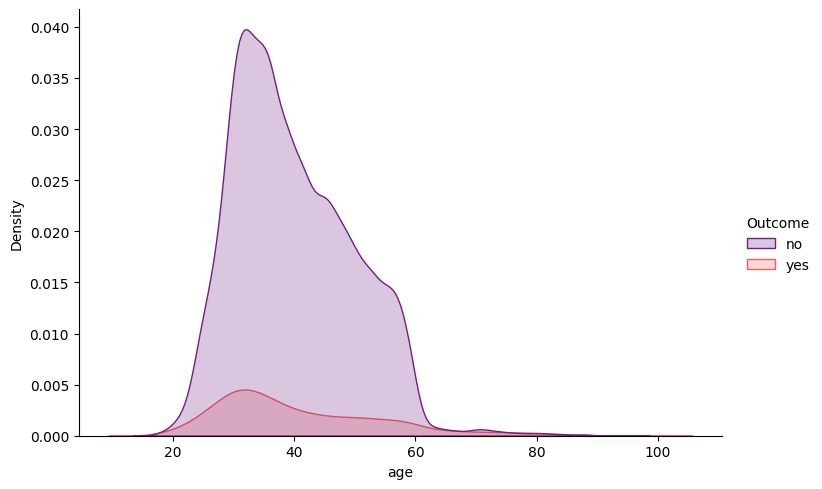

In [189]:
sns.displot(data=Data, x='age', hue='Outcome', kind='kde', fill=True, palette='magma', height=5, aspect=1.5)
plt.show()

### 2) Job Column

In [190]:
Data.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

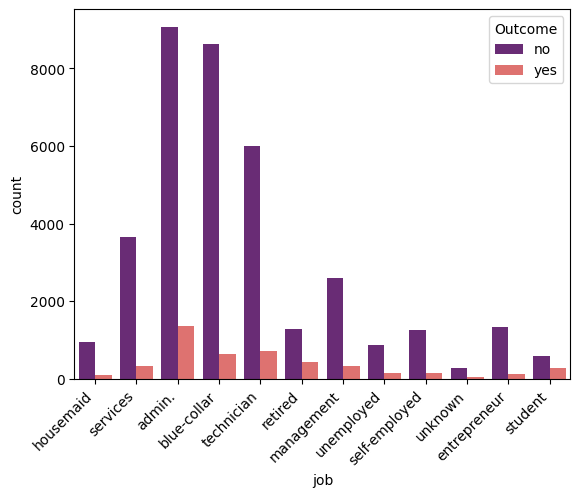

In [191]:
chart = sns.countplot(x ='job', hue = 'Outcome', data = Data, palette = 'magma')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [192]:
Data.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,ncontacts,pdays,previous,poutcome,Outcome
4763,32,blue-collar,married,basic.9y,no,no,telephone,may,wed,111,1,999,0,nonexistent,no
20449,32,admin.,single,university.degree,no,no,cellular,aug,tue,240,5,999,0,nonexistent,no
34617,33,blue-collar,single,basic.9y,no,no,cellular,may,thu,65,1,999,0,nonexistent,no
41049,21,student,single,high.school,no,no,cellular,oct,tue,701,2,999,0,nonexistent,yes
1850,32,admin.,single,university.degree,no,no,telephone,may,fri,188,2,999,0,nonexistent,no


### 3) marital column

In [193]:
Data.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

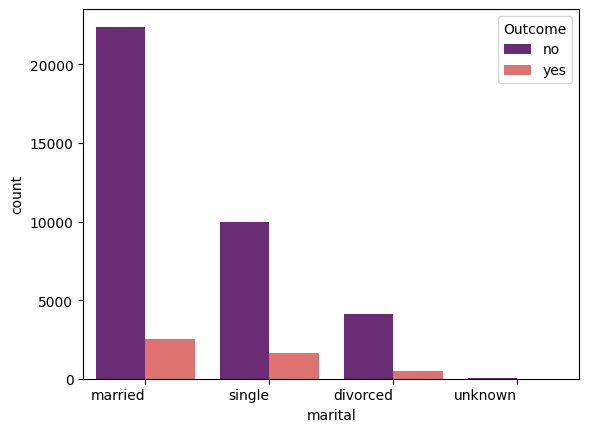

In [194]:
chart = sns.countplot(x ='marital', hue = 'Outcome', data = Data, palette = 'magma')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

### 4) education column

In [195]:
Data.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

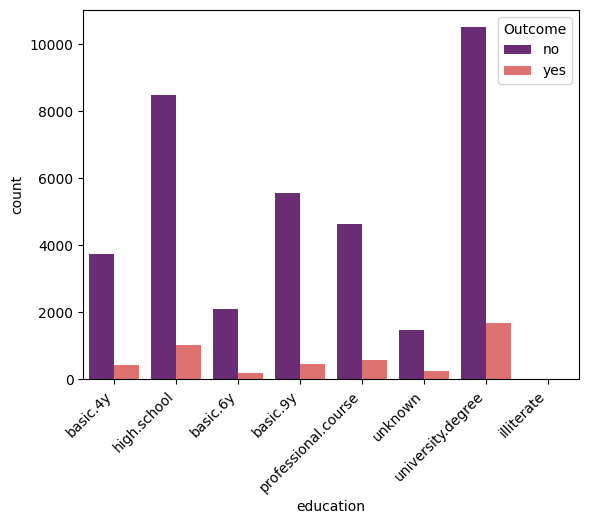

In [196]:
chart = sns.countplot(x ='education', hue = 'Outcome', data = Data, palette = 'magma')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### 5) Housing Lone

In [197]:
Data.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

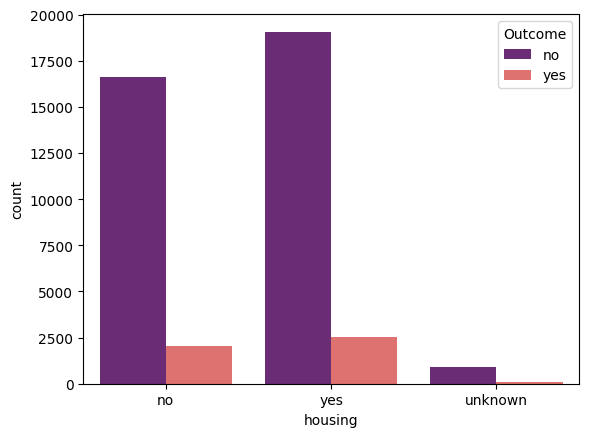

In [198]:
chart = sns.countplot(x ='housing', hue = 'Outcome', data = Data, palette = 'magma')

## 6) Presonal Loan Column

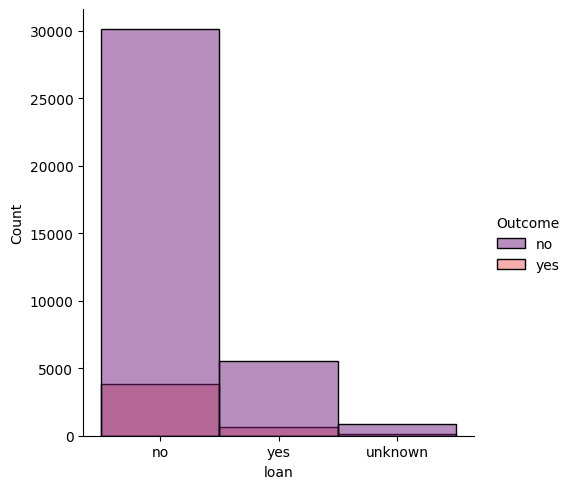

In [199]:
chart = sns.displot(x ='loan', hue = 'Outcome', data = Data, palette = 'magma')

### 7) Contact Column

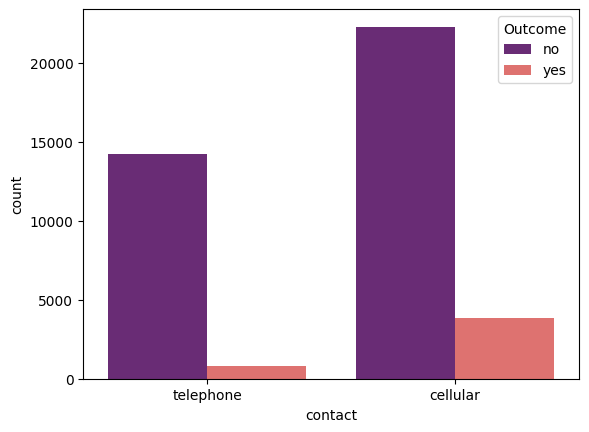

In [200]:
chart = sns.countplot(x ='contact', hue = 'Outcome', data = Data, palette = 'magma')

### 8) Month Column

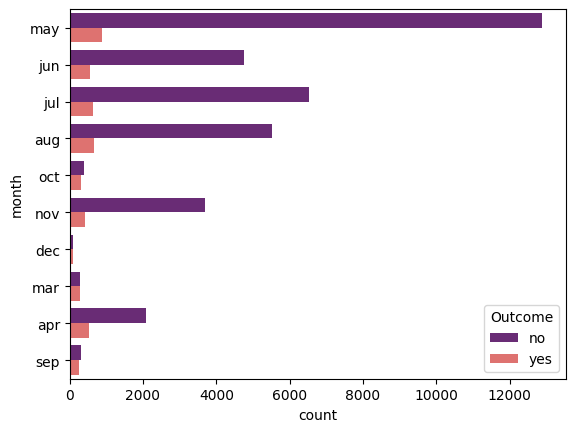

In [201]:
chart = sns.countplot(y ='month', hue = 'Outcome', data = Data, palette = 'magma')

### 9) day_of_week Column

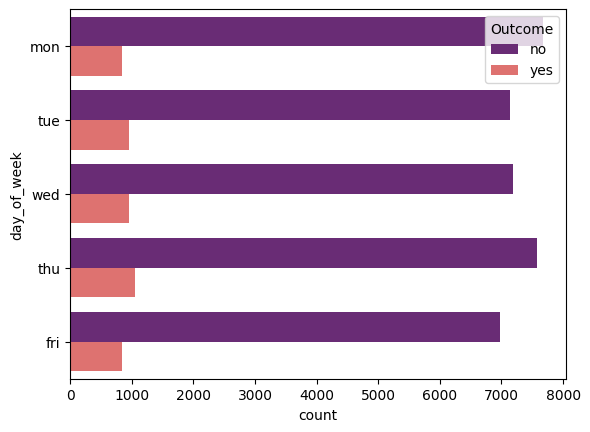

In [202]:
chart = sns.countplot(y ='day_of_week', hue = 'Outcome', data = Data, palette = 'magma')

### 10) Duration Column

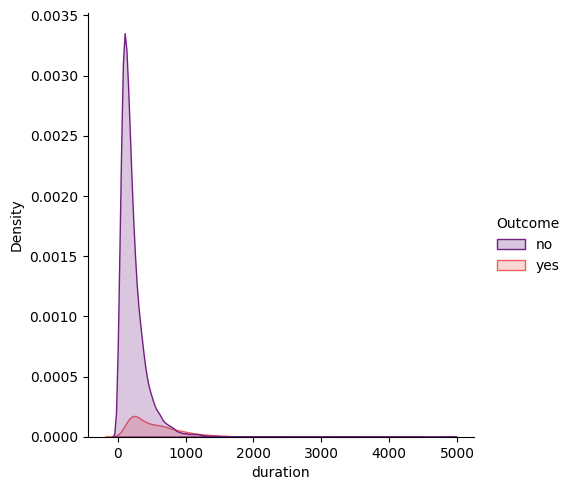

In [203]:
sns.displot(data=Data, x='duration',kind = 'kde',fill = True, hue='Outcome',  palette='magma')
plt.show()

### 11) ncontacts Column

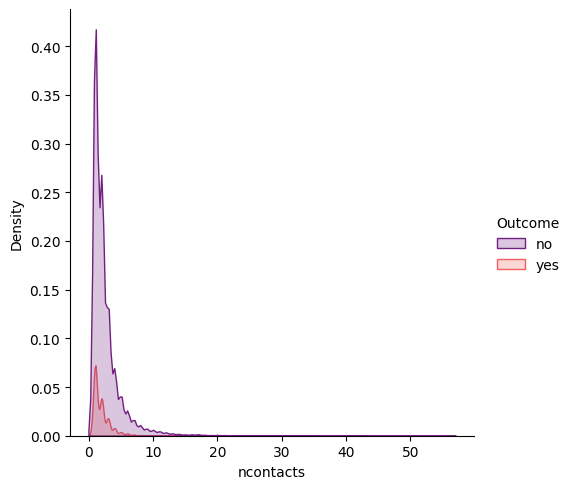

In [204]:
sns.displot(data=Data, x='ncontacts',kind = 'kde',fill = True, hue='Outcome',  palette='magma')
plt.show()

### 12) poutcome Column

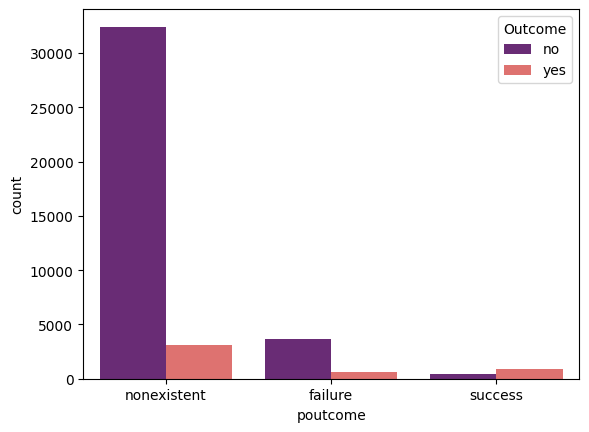

In [205]:
chart = sns.countplot(x ='poutcome', hue = 'Outcome', data = Data, palette = 'magma')

## Performing Multivariate Analysis


In [206]:
Data.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,ncontacts,pdays,previous,poutcome,Outcome
17468,45,admin.,married,high.school,yes,no,cellular,jul,mon,201,1,999,0,nonexistent,no
24763,47,management,married,university.degree,yes,no,cellular,nov,tue,283,2,999,0,nonexistent,no
37204,25,technician,single,university.degree,yes,no,telephone,aug,thu,256,1,999,0,nonexistent,yes
3415,50,unemployed,married,professional.course,no,no,telephone,may,thu,440,2,999,0,nonexistent,no
1268,39,blue-collar,married,basic.6y,no,no,telephone,may,thu,393,1,999,0,nonexistent,no


### Contact Duration Marital Status wise

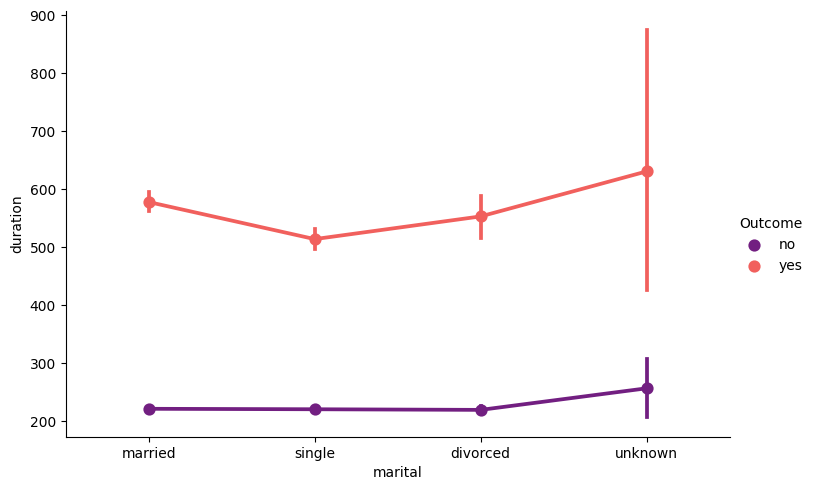

In [207]:
sns.catplot(x ='marital', y ='duration',kind = 'point',aspect = 1.5,hue = 'Outcome', data = Data,palette = 'magma')
plt.show()

### Contact Duration Age wise

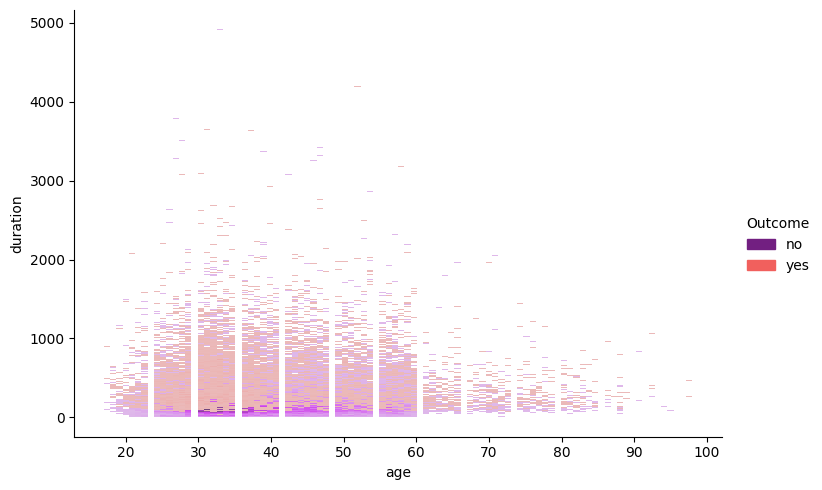

In [208]:
sns.displot(x = Data.age,y = Data.duration,palette = 'magma',hue = Data.Outcome,aspect = 1.5)
plt.show()

### Job vs PreviousOutcome of the campaign

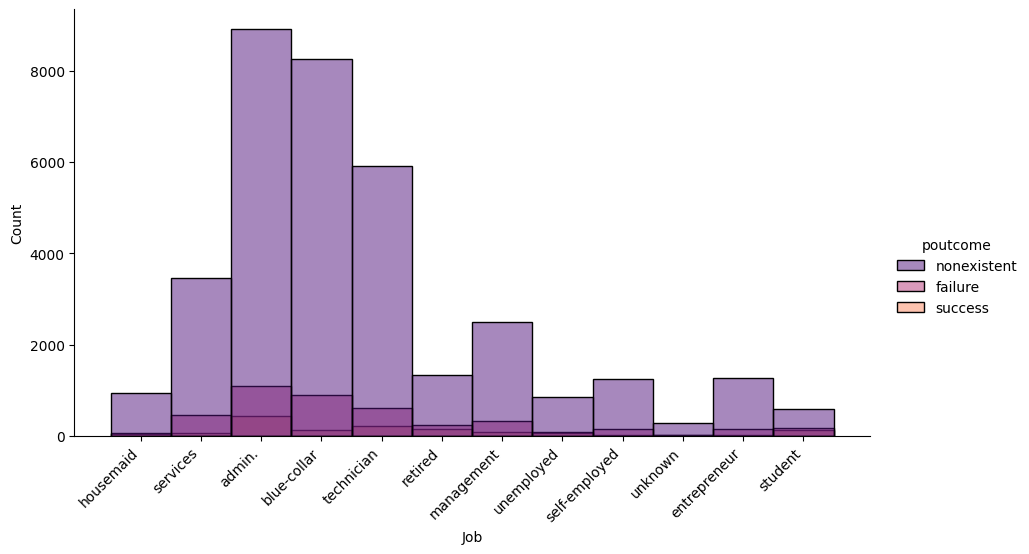

In [209]:
chart = sns.displot(x='job', data=Data, hue='poutcome', aspect=1.8, palette='magma', kind='hist')
chart.set_axis_labels('Job', 'Count')  
chart.set_xticklabels(rotation=45, horizontalalignment='right') 
plt.show()

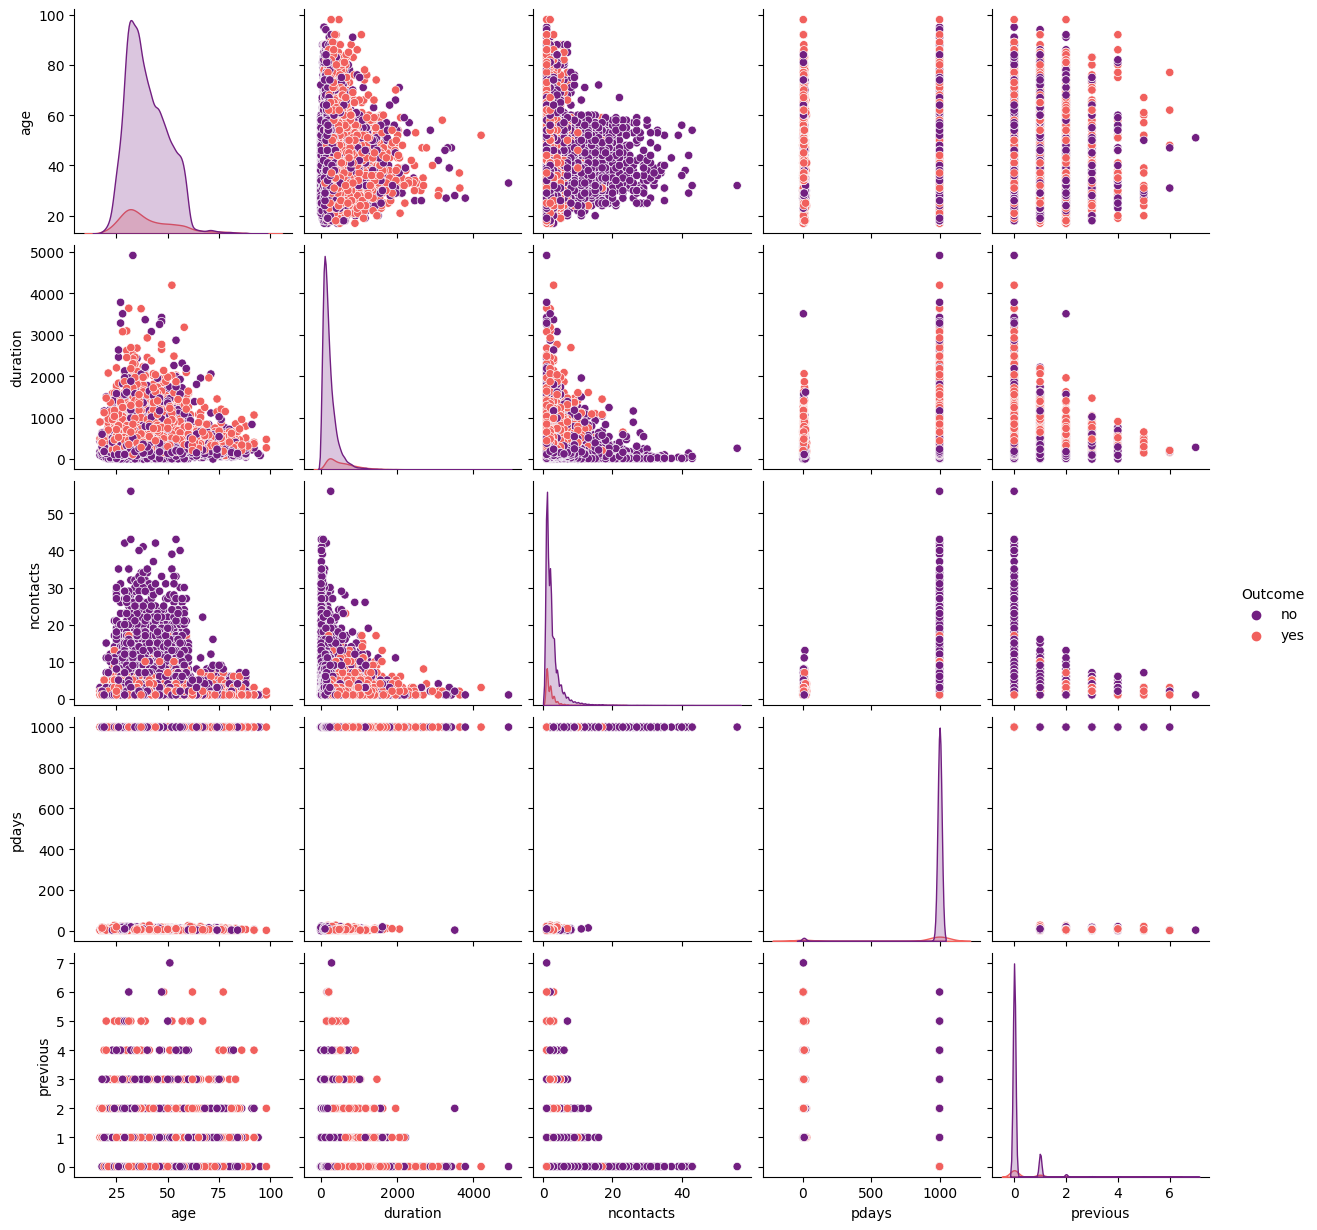

In [210]:
sns.pairplot(Data, hue ='Outcome',palette = 'magma')

### Encoding all the Categorical Columns to Numerical Columns for futher analysis

In [211]:
Data.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,ncontacts,pdays,previous,poutcome,Outcome
7674,44,admin.,married,high.school,no,no,telephone,may,fri,130,2,999,0,nonexistent,no
12553,41,entrepreneur,married,basic.4y,yes,no,cellular,jul,mon,120,1,999,0,nonexistent,no
5511,26,blue-collar,married,basic.9y,yes,no,telephone,may,mon,161,3,999,0,nonexistent,no
28835,36,admin.,single,university.degree,yes,no,cellular,apr,thu,274,2,999,0,nonexistent,no
37932,26,student,single,unknown,no,no,cellular,sep,thu,81,1,999,1,failure,no


In [212]:
columns = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome','Outcome']

In [213]:
for col in columns:  
    Data[col].replace(Data[col].unique().tolist(),np.arange(len(Data[col].unique().tolist())).tolist(), inplace=True)
Data.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,ncontacts,pdays,previous,poutcome,Outcome
4007,29,6,1,6,1,1,0,0,0,122,2,999,0,0,0
39454,48,2,0,6,1,0,1,8,3,141,1,999,0,0,1
9290,37,10,0,6,1,0,0,1,4,316,2,999,0,0,0
40916,25,1,1,1,0,0,1,4,0,251,1,999,1,1,0
5114,31,2,1,6,0,0,0,0,4,162,1,999,0,0,0


In [214]:
Data.describe().style.background_gradient(cmap = 'bone_r')

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,ncontacts,pdays,previous,poutcome,Outcome
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,3.673691,0.510634,3.277532,0.571914,0.199767,0.634748,2.250097,1.979581,258.285010,2.567593,962.475454,0.172963,0.169904,0.112654
std,10.421250,2.454116,0.696779,2.185525,0.541209,0.456002,0.481507,2.429079,1.411514,259.279249,2.770014,186.910907,0.494901,0.455754,0.316173
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,102.000000,1.000000,999.000000,0.000000,0.000000,0.000000
50%,38.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,2.000000,2.000000,180.000000,2.000000,999.000000,0.000000,0.000000,0.000000
75%,47.000000,4.000000,1.000000,6.000000,1.000000,0.000000,1.000000,3.000000,3.000000,319.000000,3.000000,999.000000,0.000000,0.000000,0.000000
max,98.000000,11.000000,3.000000,7.000000,2.000000,2.000000,1.000000,9.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.000000


### Checking correlation

In [215]:
Data.corr()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,ncontacts,pdays,previous,poutcome,Outcome
age,1.000000,0.030413,-0.114983,-0.091900,-0.001923,-0.006397,-0.007021,0.083423,-0.018486,-0.000866,0.004594,-0.034369,0.024365,0.026371,0.030399
job,0.030413,1.000000,-0.008109,0.164598,0.005750,-0.004950,0.017054,0.076486,-0.001608,0.009575,-0.017085,-0.051677,0.051348,0.049070,0.054793
marital,-0.114983,-0.008109,1.000000,0.063774,0.007436,0.001719,0.043564,0.020613,-0.004210,0.001220,0.002269,-0.017635,0.030222,0.030627,0.026302
education,-0.091900,0.164598,0.063774,1.000000,0.013023,0.001887,0.095383,0.114478,0.008519,-0.014778,-0.001521,-0.034772,0.022826,0.025419,0.045721
housing,-0.001923,0.005750,0.007436,0.013023,1.000000,0.289759,0.065393,0.046369,-0.007088,-0.009050,-0.010190,-0.008741,0.021002,0.021433,0.009552
loan,-0.006397,-0.004950,0.001719,0.001887,0.289759,1.000000,-0.004391,-0.009311,0.003206,-0.003194,0.003899,0.001298,0.000846,-0.000581,-0.005038
contact,-0.007021,0.017054,0.043564,0.095383,0.065393,-0.004391,1.000000,0.430499,-0.019583,0.026657,-0.077368,-0.117970,0.212848,0.226813,0.144773
month,0.083423,0.076486,0.020613,0.114478,0.046369,-0.009311,0.430499,1.000000,0.011701,0.018180,-0.080737,-0.135025,0.175737,0.184769,0.183471
day_of_week,-0.018486,-0.001608,-0.004210,0.008519,-0.007088,0.003206,-0.019583,0.011701,1.000000,0.010549,0.015098,0.006765,0.004013,0.003279,0.010051
duration,-0.000866,0.009575,0.001220,-0.014778,-0.009050,-0.003194,0.026657,0.018180,0.010549,1.000000,-0.071699,-0.047577,0.020640,0.026465,0.405274


<Axes: >

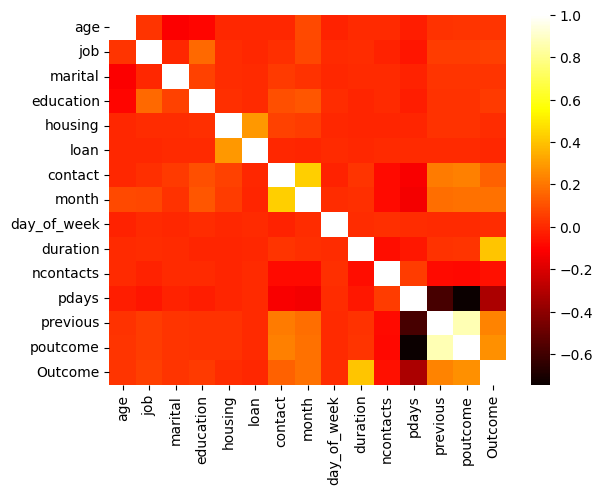

In [216]:
sns.heatmap(Data.corr(),cmap = 'hot')

Since our target variable is Outcome column that has the lowest correlation with the pdays column it is better to drop that column

In [217]:
Data.drop(['pdays'],axis = 1,inplace = True)

In [218]:
Data.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,ncontacts,previous,poutcome,Outcome
19441,35,4,0,4,1,1,1,3,3,122,3,0,0,0
27569,44,6,1,6,0,0,1,5,4,534,2,0,0,1
11852,41,2,0,1,0,0,0,1,4,23,7,0,0,0
16689,32,3,0,2,1,0,1,2,2,158,4,0,0,0
7594,31,2,0,6,0,0,0,0,4,294,3,0,0,0


In [219]:
# Taking our Target varible(Outcome) in Y variable
Y = Data.Outcome.to_numpy()

In [220]:
# Now removing the Outcome column from the dataset
Data.drop(['Outcome'],axis = 1,inplace = True)
Data.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,ncontacts,previous,poutcome
33697,41,1,0,1,1,0,1,0,2,193,1,0,0
35482,42,4,1,6,1,0,1,0,0,33,2,0,0
32696,42,3,0,2,0,0,1,0,0,15,6,0,0
24876,48,2,0,5,0,0,1,5,1,319,2,1,1
13420,46,4,0,6,2,2,1,2,2,364,1,0,0


In [221]:
# Dataset
X = Data.to_numpy()
X

array([[56,  0,  0, ...,  1,  0,  0],
       [57,  1,  0, ...,  1,  0,  0],
       [37,  1,  0, ...,  1,  0,  0],
       ...,
       [56,  5,  0, ...,  2,  0,  0],
       [44,  4,  0, ...,  1,  0,  0],
       [74,  5,  0, ...,  3,  1,  1]], dtype=int64)

X: It represents the feature matrix, which contains the input variables or features used to make predictions.

Y: It represents the target vector, which contains the corresponding labels or values that the model aims to predict.

x_train: The training set containing 70% of the features used to train the model.

x_test: The testing set containing 30% of the features used to evaluate the model's performance.

y_train: The corresponding target values for the training set.

y_test: The corresponding target values for the testing set.


In [222]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (28831, 13)
x_test shape:  (12357, 13)
y_train shape:  (28831,)
y_test shape:  (12357,)


## Applying Decision Tree Classifier Model


In [223]:
dtc = DecisionTreeClassifier(random_state = 0)

# Training our machine
dtc.fit(x_train,y_train)

# Making predictions
dtc_predict = dtc.predict(x_test)

# Calculating Accuracy
dtc_acc = accuracy_score(dtc.predict(x_test),y_test)

print(f"Accuracy: {dtc_acc}")

Accuracy: 0.8728655822610666


An accuracy of 87.2% means that the Decision Tree Classifier achieved a correct prediction rate of approximately 87.2% on the test data. In other words, out of all the data points in the test set, around 87.2% of them were correctly classified by the model.

## Applying SVM Model

In [224]:
svm_class = svm.SVC(kernel = 'rbf')

# Training our machine
svm_class.fit(x_train,y_train)

# Making predictions
svm_predict = svm_class.predict(x_test)

# Calculating Accuracy
svm_acc = accuracy_score(svm_class.predict(x_test),y_test)

print(f"Accuracy: {svm_acc}")

Accuracy: 0.8918831431577243


An accuracy of 89.1% means that the Support Vector Machine (SVM) classifier achieved a correct prediction rate of approximately 89.1% on the test data. In comparison to the Decision Tree Classifier you previously used (with an accuracy of 87.2%), the SVM classifier provided slightly better performance on this particular test dataset.

In the above code, the SVM is using a radial basis function (RBF) kernel (kernel='rbf'). The RBF kernel is capable of transforming the data into higher-dimensional space, enabling the SVM to find non-linear decision boundaries. This can be beneficial when the data is not easily separable by linear boundaries, allowing the SVM to capture more complex patterns.

## Applying GaussianNB Model

In [225]:
gnb = GaussianNB()

# Training our machine
gnb.fit(x_train,y_train)

# Making predictions
gnb_predict = gnb.predict(x_test)

# Calculating Accuracy
gnb_acc = accuracy_score(gnb_predict,y_test)

print(f"Accuracy: {gnb_acc}")

Accuracy: 0.8463219227967953


An accuracy of 84.6% means that the Gaussian Naive Bayes classifier (GaussianNB) achieved a correct prediction rate of approximately 84.6% on the test data. Compared to the Decision Tree Classifier (87.2%) and the Support Vector Machine (SVM) classifier (89.1%), the GaussianNB provided slightly lower accuracy on this particular test dataset.

Here's an explanation of why GaussianNB might have achieved this accuracy:

Assumption of Feature Independence: Gaussian Naive Bayes assumes that all features are conditionally independent given the class label. This is a strong assumption and might not hold in all datasets. If the features are not entirely independent, the model's performance may be limited.

Simplicity and Speed: GaussianNB is a simple and fast algorithm that is easy to implement and works well with high-dimensional datasets. However, its simplicity can lead to lower accuracy compared to more complex algorithms like SVM.

## Applying Logistic Regression Model

In [226]:
lgr = LogisticRegression(max_iter=1000)

# Training our machine
lgr.fit(x_train, y_train)

# Making predictions
lgr_predict = lgr.predict(x_test)

# Calculating Accuracy
lgr_acc = accuracy_score(lgr_predict, y_test)

print(f"Accuracy: {lgr_acc}")


Accuracy: 0.9002184996358339


An accuracy of 90% means that the Logistic Regression model achieved a correct prediction rate of approximately 90% on the test data. Logistic Regression is a popular and effective algorithm for binary classification tasks, and here's an explanation of why it might have achieved this high accuracy

## Conclusion
Let's compare the accuracy of all the machine learning models you used: Decision Tree Classifier, Support Vector Machine (SVM), Gaussian Naive Bayes (GaussianNB), and Logistic Regression. Here's a summary of their accuracies:

Decision Tree Classifier: Accuracy = 87.2%
Support Vector Machine (SVM): Accuracy = 89.1%
Gaussian Naive Bayes (GaussianNB): Accuracy = 84.6%
Logistic Regression: Accuracy = 90.0%

Comparing the accuracies:

* Logistic Regression achieved the highest accuracy of 90.0%, indicating that it had the best performance on this particular test dataset among the models you used.

* Support Vector Machine (SVM) had the second-highest accuracy of 89.1%, slightly behind Logistic Regression.

* Decision Tree Classifier obtained an accuracy of 87.2%, performing well but with a slightly lower accuracy than SVM and Logistic Regression.

* Gaussian Naive Bayes (GaussianNB) achieved an accuracy of 84.6%, which is the lowest among the models used.

The reasons for Logistic Regression obtaining the highest accuracy for this specific dataset can be attributed to several factors:

1) Linear Separability: Logistic Regression assumes a linear relationship between the features and the target variable. If the data is reasonably well-separated by a linear boundary, Logistic Regression can be effective in capturing the relationship and making accurate predictions. In this dataset, the classes might be relatively linearly separable, contributing to the higher accuracy.

2) Binary Classification Task: Logistic Regression is specifically designed for binary classification tasks, where the target variable has two classes. If the problem at hand is binary in nature, Logistic Regression can perform well, especially when the classes are well-balanced.

3) Feature Importance: Logistic Regression provides coefficients for each feature, indicating their impact on the target variable. If the relevant features have strong predictive power, Logistic Regression can make accurate predictions based on their contributions.

4) Regularization: Regularization techniques in Logistic Regression, such as L1 (Lasso) or L2 (Ridge) regularization, help prevent overfitting and improve generalization. Regularization can lead to better performance, especially when the dataset is not too large, and overfitting is a concern.

5) Data Scaling: Logistic Regression is not sensitive to feature scaling, which means it can handle features with different scales effectively. If the features in the dataset have different ranges, Logistic Regression's insensitivity to scaling might contribute to its accuracy.

6) Fast Training: Logistic Regression is relatively computationally efficient and has a fast training time. It can be advantageous for datasets with a moderate number of features and instances.
